In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import*

In [2]:
sides = 3
mus = np.arange(-np.pi+np.pi/sides,np.pi,2*np.pi/sides)
sig = 0.05

# Define the Gaussian function
def gaussian(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Define the lambda functions for the Fourier coefficients
fc = lambda x: np.sum(gaussian(x, mu, sig) for mu in mus) * np.cos(i*x)
fs = lambda x: np.sum(gaussian(x, mu, sig) for mu in mus) * np.sin(i*x)

def get_polygon(angles, lengths):
    x = [0]  # Starting x-coordinate
    y = [0]  # Starting y-coordinate

    for angle, length in zip(angles, lengths):
        # Compute the endpoint coordinates of the current edge
        x_end = x[-1] + length * np.cos(angle)
        y_end = y[-1] + length * np.sin(angle)
        
        # Append the endpoint coordinates to the x and y arrays
        x.append(x_end)
        y.append(y_end)

    # Connect the last point to the starting point to close the polygon
    x.append(x[0])
    y.append(y[0])

    return x,y

In [3]:
# x axis has been chosen from –π to +π, value of 1 smallest square along x axis is 0.001 
x = np.arange(-np.pi, np.pi, 0.001)
y = np.sum(gaussian(x, mu, sig) for mu in mus)  # defining square wave function y =−1 for −𝜋 ≤ x ≤ 0, y = +1 for 0 ≤ x ≤ 𝜋

/var/folders/ng/l4j590g95vl5r33ctw59y6cr0000gn/T/ipykernel_51862/606250055.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  y = np.sum(gaussian(x, mu, sig) for mu in mus)  # defining square wave function y =−1 for −𝜋 ≤ x ≤ 0, y = +1 for 0 ≤ x ≤ 𝜋


In [14]:
# Rest of the code remains the same...
n = 50
An = []
Bn = []
sum = 0

for i in range(n):
    an = quad(fc, -np.pi, np.pi, limit=100)[0] * (1.0 / np.pi)
    An.append(an)

for i in range(n):
    bn = quad(fs, -np.pi, np.pi, limit=100)[0] * (1.0 / np.pi)
    Bn.append(bn)

for i in range(n):
    if i == 0.0:
        sum = sum + An[i] / 2
    else:
        sum = sum + (An[i] * np.cos(i*x) + Bn[i] * np.sin(i*x))

/var/folders/ng/l4j590g95vl5r33ctw59y6cr0000gn/T/ipykernel_51862/4169842062.py:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  fc = lambda x: np.sum(gaussian(x, mu, sig) for mu in mus) * np.cos(i*x)
/var/folders/ng/l4j590g95vl5r33ctw59y6cr0000gn/T/ipykernel_51862/4169842062.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  fs = lambda x: np.sum(gaussian(x, mu, sig) for mu in mus) * np.sin(i*x)


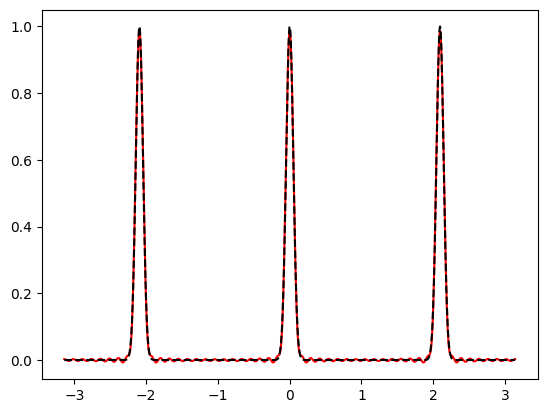

In [15]:
plt.plot(x, sum, color='red')
plt.plot(x, y, color='black', linestyle='dashed')
plt.show()

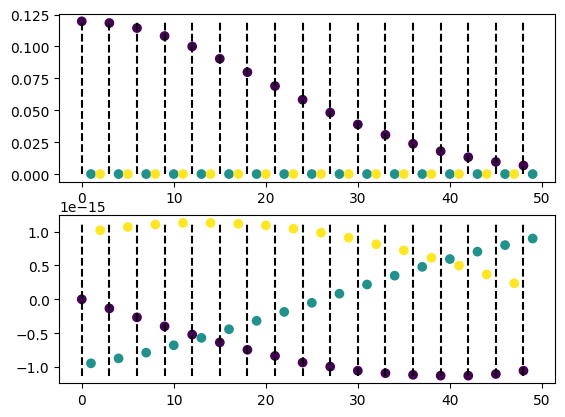

In [16]:
fig,(ax1,ax2) = plt.subplots(2,1)

ax1.scatter(np.arange(0, n), An, c=np.arange(0, n) % sides)
ax1.vlines(x=np.arange(0, n)[np.arange(0, n) % sides == 0], ymin=np.min(An), ymax=np.max(An), colors='black', linestyles='dashed')

ax2.scatter(np.arange(0, n), Bn, c=np.arange(0, n) % sides)
ax2.vlines(x=np.arange(0, n)[np.arange(0, n) % sides == 0], ymin=np.min(Bn), ymax=np.max(Bn), colors='black', linestyles='dashed')

plt.show()

In [17]:
# Example usage:
angles = x  # Example angles
lengths = y
fourier_lengths = sum

poly = get_polygon(angles, lengths)
reconstructed_poly = get_polygon(angles, fourier_lengths)

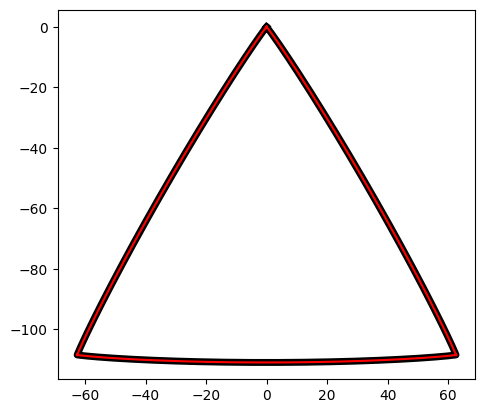

In [18]:
plt.plot(poly[0], poly[1], color='black', linewidth=5)
plt.plot(reconstructed_poly[0], reconstructed_poly[1], color='red')
plt.gca().set_aspect('equal')
plt.show()